## Code to generate Figure 3C graphics
Average (over the simulation) angle correlations were calculated per replicate using the 'get_angle_decay' function in soursop (on amide bond vector). Angle correlation values from independent replicates were averaged and then fit to an exponential decay model to extract persistence length (in units of residues). For simplicity, this script loads the trajectory- and replicate-averaged correlation values from a text file (already merged/averaged). Error bars reflecting the standard deviation from the mean of five replicates for angle correlation decay points are smaller than the points themselves and so are not presented (but are found as the third element of the loaded text file). 

This code loads csv text files from 'data/'.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit

In [4]:
## load csv files with end-to-end distances (Ree) from replicates ##
# 'reps' indicates the data are organized per-replicate (instead of merged)

TauS = np.loadtxt('data/TauS_decay_data.txt')
pTauS = np.loadtxt('data/pTauS_decay_data.txt')
TauT = np.loadtxt('data/TauT_decay_data.txt')
pTauT = np.loadtxt('data/pTauT_decay_data.txt')
TauE = np.loadtxt('data/TauE_decay_data.txt')

seqs = ['TauS', 'TauT', 'pTauS', 'pTauT', 'TauE']
all_decays = [TauS, TauT, pTauS, pTauT, TauE]

In [10]:
## the function 'pl_fit' determines persistence length from angle decay values via Eq. 3 ##
# x == inter-residue separation (list at index 0 in files above)
# pl == persistence length in units of residues

def pl_fit(x, pl):
    return np.exp(-x / pl)

# store all fitted parameters in 'plengths'
plengths = []
pl_errors = []
for peptide in all_decays:
    x = peptide[0]     # inter-residue separation
    y = peptide[1]     # angle decay correlation values
    
    [popt, pcov] = curve_fit(pl_fit, x, y)
    
    plengths.append(popt)
    pl_errors.append(pcov)

In [27]:
## generate "fits" to be plotted on fitted data points for each peptide ##
# xfit is the same for all peptides (generated data points between min/max interresidue separation values)
# yfit stores the best-fit data for each peptide (tuple), used in visualization
xdata = all_decays[0][0]
xfit = np.arange(min(xdata), max(xdata), 0.1)

yfit = []
for pl in plengths:
    fitline = np.array(pl_fit(xfit, pl))
    yfit.append(fitline)
    

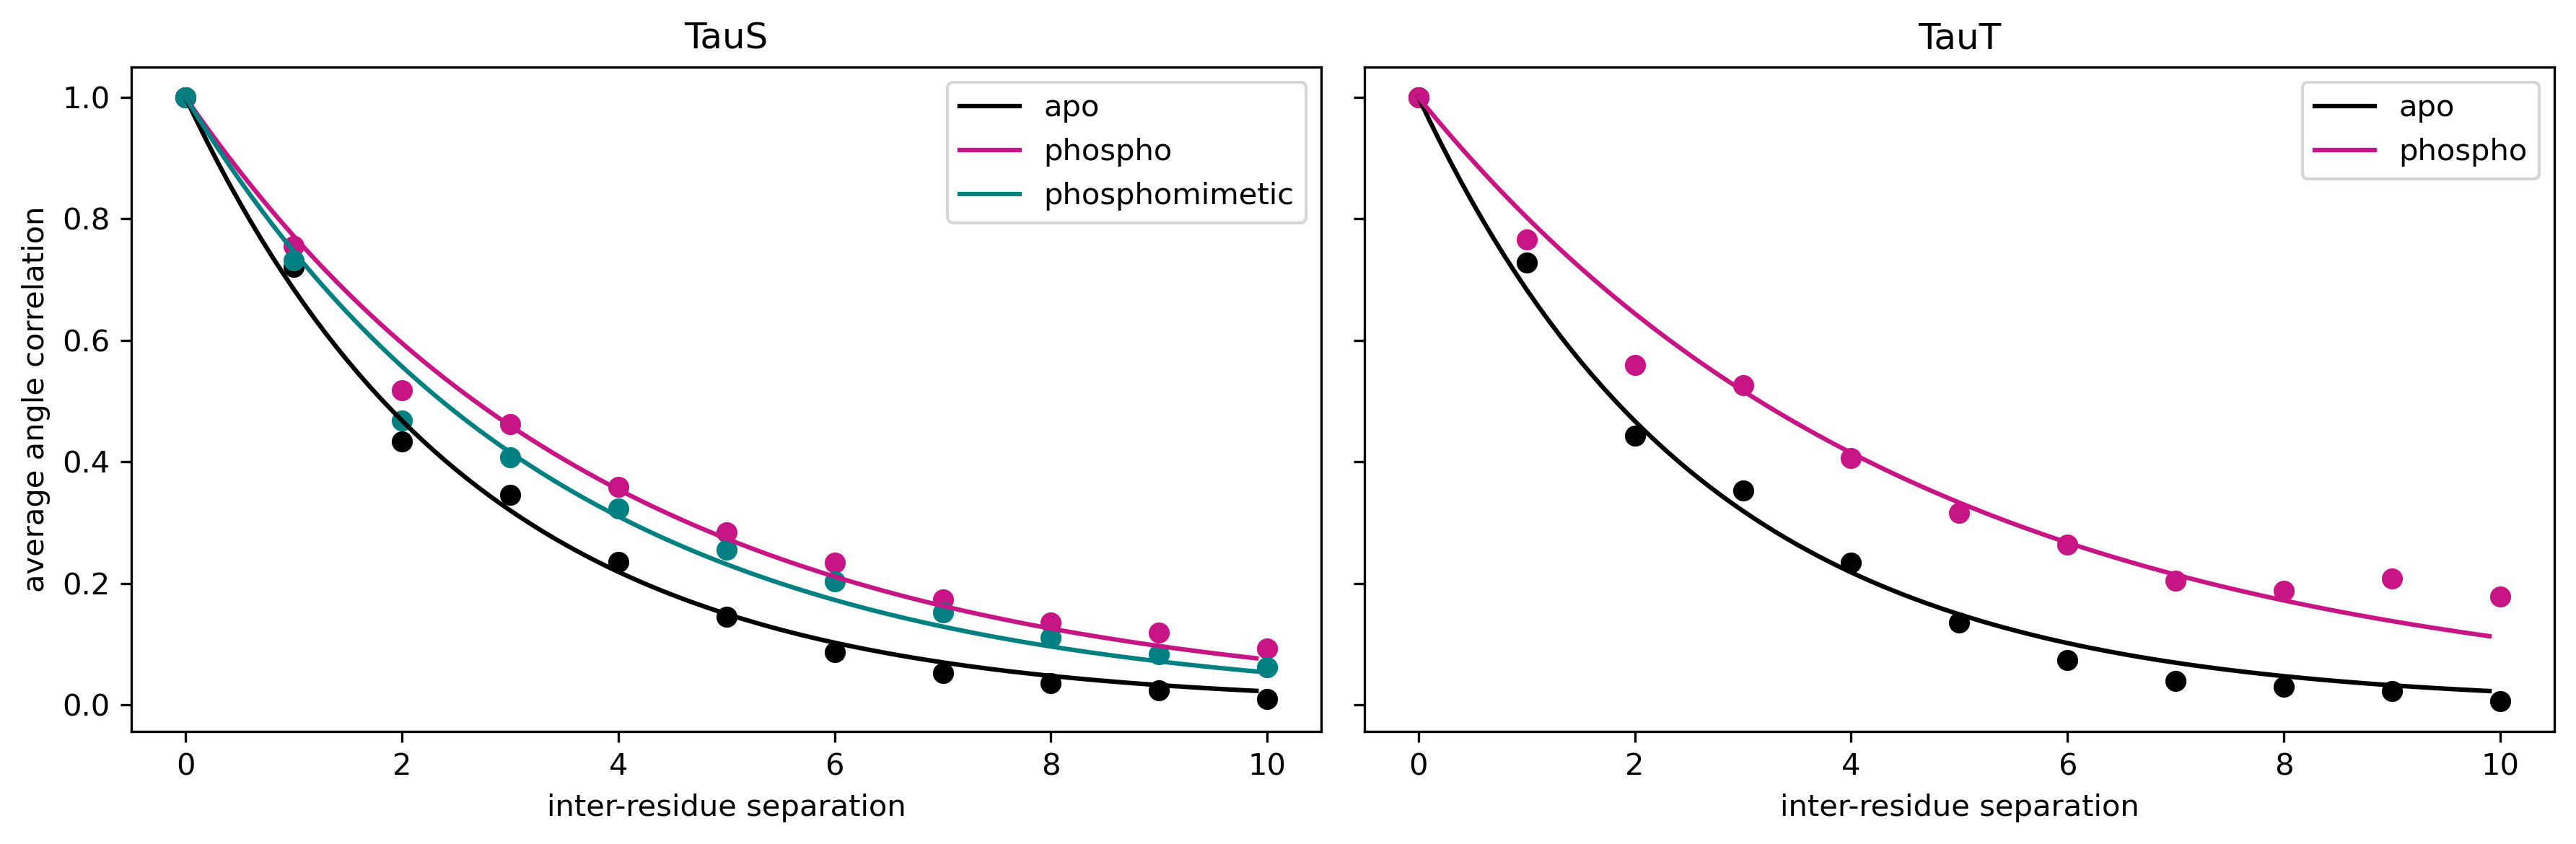

In [39]:
## generate angle decay plot/fit graphics (PANEL C) ##
# TauS on left panel (axes[0]), TauT on right panel (axes[1])
# NB: Table S3 presents a fitted persistence length for TauE/eTau although the raw data are not presented in this panel

fig, axes = plt.subplots(1, 2, figsize = (12, 4), dpi = 300, sharey = True)

# for LEFT panel
axes[0].scatter(xdata, TauS[1], color = 'k')
axes[0].plot(xfit, yfit[0], color = 'k', label = 'apo')

axes[0].scatter(xdata, pTauS[1], color = 'mediumvioletred')
axes[0].plot(xfit, yfit[2], color = 'mediumvioletred', label = 'phospho')

axes[0].scatter(xdata, TauE[1], color = 'teal')
axes[0].plot(xfit, yfit[4], color = 'teal', label = 'phosphomimetic')

axes[0].set_ylabel('average angle correlation')
axes[0].set_xlabel('inter-residue separation')
axes[0].set_title('TauS')
axes[0].legend(loc = 'upper right')

# for RIGHT panel
axes[1].scatter(xdata, TauT[1], color = 'k')
axes[1].plot(xfit, yfit[1], color = 'k', label = 'apo')

axes[1].scatter(xdata, pTauT[1], color = 'mediumvioletred')
axes[1].plot(xfit, yfit[3], color = 'mediumvioletred', label = 'phospho')

axes[1].set_xlabel('inter-residue separation')
axes[1].set_title('TauT')
axes[1].legend(loc = 'upper right')

plt.tight_layout()

plt.savefig('Tau_decay_fits_3C.pdf', format = 'pdf', dpi = 300)

plt.show()